In [185]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr
from scipy.stats import iqr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [186]:
path = './'
df = pd.read_csv(path + "student_grades.csv")

In [187]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [188]:
df.shape

(104, 5)

In [189]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,78.461538,77.307692,84.153846,81.692308
std,30.166206,14.284844,10.295703,8.714199,10.918122
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,26.750000,70.000000,70.000000,78.000000,72.000000
50%,52.500000,79.000000,75.000000,85.000000,81.000000
75%,78.250000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


### Using the example data above:

- Extract information from the results of .describe and compute IQR and range of each exam and the final grade

In [190]:
iqr(df.exam1,axis=0)

22.0

In [191]:
iqr(df.exam2,axis=0)

19.0

In [192]:
iqr(df.exam3,axis=0)

16.0

In [193]:
iqr(df.final_grade,axis=0)

21.0

In [194]:
df.exam1.max() - df.exam1.min()

43

In [195]:
df.exam2.max() - df.exam2.min()

28

In [196]:
df.exam3.max() - df.exam3.min()

26

In [197]:
df.final_grade.max() - df.final_grade.min()

32

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          104 non-null int64
exam2          104 non-null int64
exam3          104 non-null int64
final_grade    104 non-null int64
dtypes: int64(5)
memory usage: 4.1 KB


In [199]:
print(df.isnull().sum())

student_id     0
exam1          0
exam2          0
exam3          0
final_grade    0
dtype: int64


In [200]:
# we will create a melted version of train for visualization purposes
df_melted = pd.melt(df, id_vars=['student_id'], value_vars=['exam1','exam2','exam3','final_grade'], 
                    var_name='grade_type', value_name='score')

df_melted.head()

,student_id,grade_type,score
0,1,exam1,100
1,2,exam1,98
2,3,exam1,85
3,4,exam1,83
4,5,exam1,93


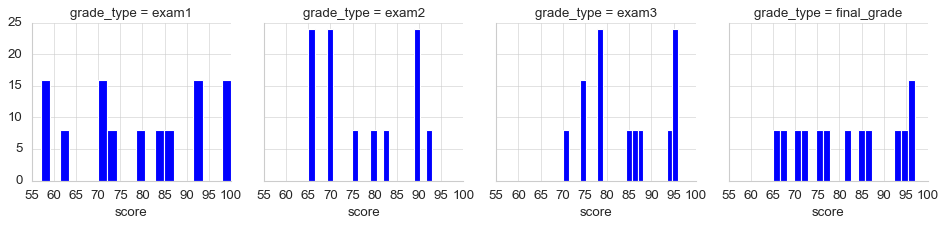

In [98]:
# Histogram
grid = sns.FacetGrid(df_melted, col="grade_type", margin_titles=True)
grid.map(plt.hist, "score", bins=20);

- Write a for loop to plot each of the 3 features (exam 1, 2, & 3) with the final grade using a joint plot. What can you say about each relationship (using pearson's r and the p-value)

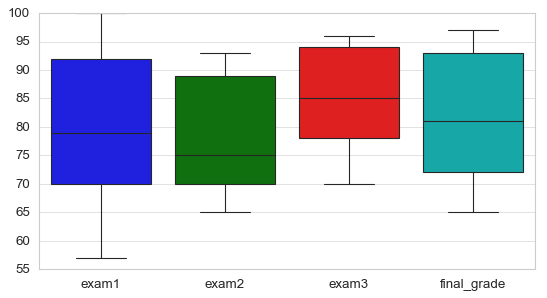

In [117]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['student_id']))

- Find a way to plot the boxplot & heatmap from section 6 side by side.

In [56]:
# test_train_split
X = df.drop(['final_grade','student_id'], axis=1)
y = df[['final_grade']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

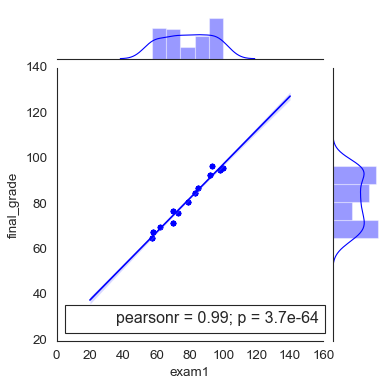

In [121]:
with sns.axes_style('white'):
    j = sns.jointplot("exam1", "final_grade", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

<Figure size 1280x800 with 0 Axes>

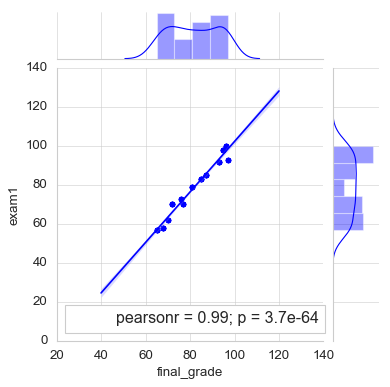

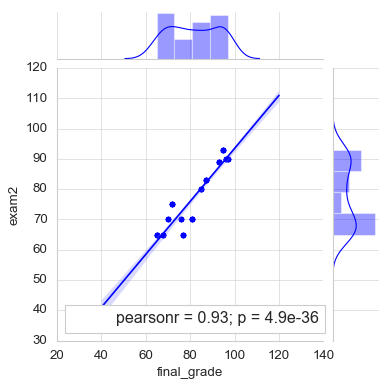

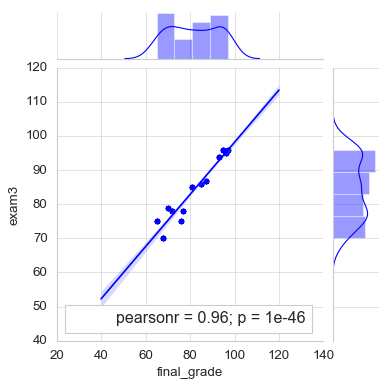

In [184]:
plt.figure(figsize=(16, 10))

for i in range(1,4):
    j = sns.jointplot('final_grade', 'exam{}'.format(i), data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)

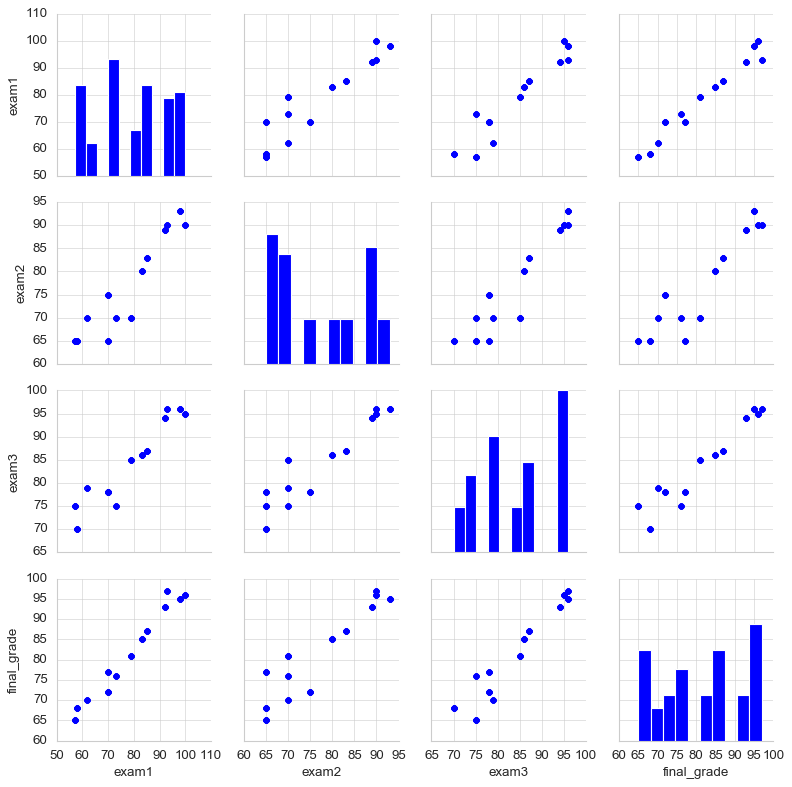

In [127]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

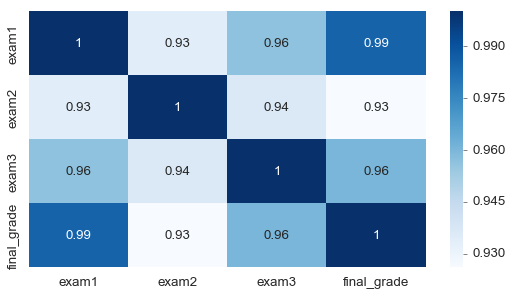

In [128]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

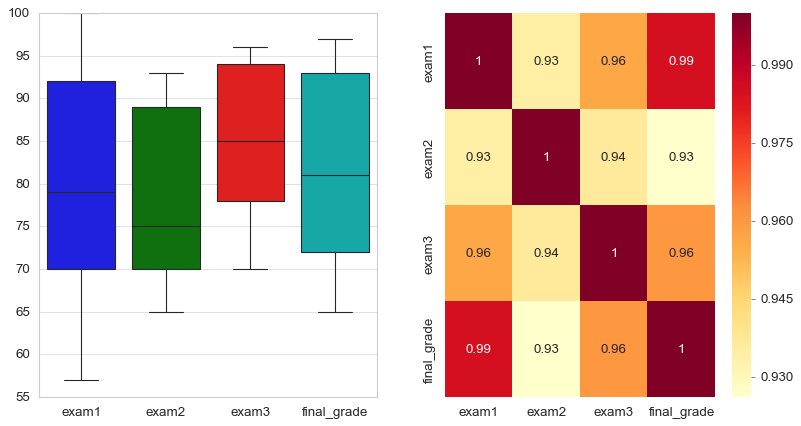

In [180]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.boxplot(data=df.drop(columns=['student_id']), ax=ax[0])
sns.heatmap(train.corr(), ax=ax[1], annot=True, cmap='YlOrRd')

plt.show()

### Pearson's Correlation

Training the model starts here:

In [227]:
pearsonr(X_train[['exam1']], y_train)

(array([0.98548827]), array([3.67959731e-64]))

### Create Dictionary

In [225]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.final_grade) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'exam1': (0.9854882734738365, 3.679597306767771e-64),
 'exam2': (0.9260773842724218, 4.9387065956533756e-36),
 'exam3': (0.9604227932900589, 1.0003417783597307e-46)}

### Feature Selection

In [202]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.103e+04
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          3.76e-131
Time:                        14:24:11   Log-Likelihood:                -170.25
No. Observations:                  83   AIC:                             346.5
Df Residuals:                      80   BIC:                             353.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exam1          0.4555      0.036     12.625      0.000       0.384       0.527
exam2         -0.0307      0.063     -0.486      0.629      -0.157       0.095
exam3          0.5728      0.049     11.633      0.000       0.475       0.671
==============================================================================
Omnibus:                       30.491   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.671
Skew:                           0.427   Prob(JB):                       0.0216
Kurtosis:                       1.780   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Model 1:

In [264]:
lm1 = LinearRegression()
lm1.fit(X_train[['exam1']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)
y_pred_lm1 = lm1.predict(X_train[['exam1']])
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1))
r2_lm1 = r2_score(y_train, y_pred_lm1)

print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the first exam.'.format(r2_lm1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[22.88211318]
[[0.74850854]]
lm1
  mse: 3.37
  97.12% of the variance in the students final grade can be explained by the grade on the first exam.


### Linear Model 2:

In [263]:
lm2 = LinearRegression()
lm2.fit(X_train[['exam1', 'exam3']], y_train)
print(lm2)
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)
y_pred_lm2 = lm2.predict(X_train.drop(columns=['exam2']))
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2))
r2_lm2 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1 and 3.'.format(r2_lm2))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[12.79518052]
[[0.59709165 0.26106586]]
lm2
  mse: 2.94
  97.49% of the variance in the students final grade can be explained by the grades on exam 1 and 3.


### Linear Model 3:

Fit, predict, and evaluate one more model, lm3, using 'exam 3' only.

#### Create the linear regression object

In [265]:
lm3 = LinearRegression()
lm3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### FIT/TRAIN THE MODEL

In [270]:
lm3.fit(X_train[['exam3']], y_train)
print(lm3)

lm3_y_intercept = lm3.intercept_
print(lm3_y_intercept)

lm3_coefficients = lm3.coef_
print(lm3_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[-19.62667326]
[[1.20315159]]


In [271]:
print('Univariate - final_exam = b + m * exam1')
print('    y-intercept (b): %.2f' % lm3_y_intercept)
print('    coefficient (m): %.2f' % lm3_coefficients[0])
print()

Univariate - final_exam = b + m * exam1
    y-intercept (b): -19.63
    coefficient (m): 1.20



#### IN-SAMPLE PREDICTION

In [272]:
y_pred_lm3 = lm3.predict(X_train[['exam3']])

#### TRAIN/IN-SAMPLE EVALUATIONS

In [273]:
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print("lm3\n  mse: {:.3}".format(mse_lm3)) 

lm3
  mse: 9.08


In [274]:
r2_lm3 = r2_score(y_train, y_pred_lm3)

In [275]:
print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the third exam.'.format(r2_lm3))

  92.24% of the variance in the students final grade can be explained by the grade on the third exam.


#### COMPARE THE 3 MODELS

Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

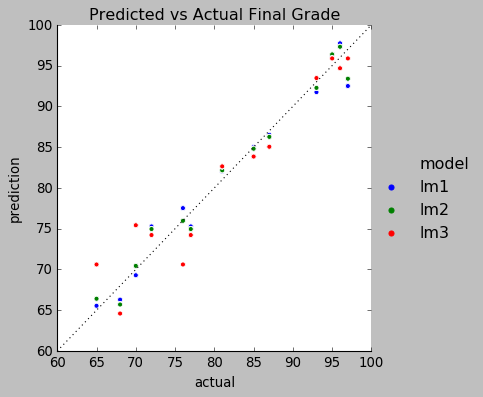

In [276]:
pd.DataFrame({'actual': y_train.final_grade,
              'lm1': y_pred_lm1.ravel(),
              'lm2': y_pred_lm2.ravel(),
              'lm3': y_pred_lm3.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Final Grade')

#### Predict final grades using testing data

In [279]:
y_pred_lm3 = lm3.predict(X_test[['exam3']])

#### Evaluate performance

In [245]:
mse = mean_squared_error(y_test, y_pred_lm3)

print("Mean squared error: %.2f" % mse)

Mean squared error: 12.14


In [247]:
r2 = r2_score(y_test, y_pred_lm3)
print('{:.2%} of the variance in the student''s final grade can be explained by the grades on the first 3 exams.'
      .format(r2))

90.07% of the variance in the students final grade can be explained by the grades on the first 3 exams.


#### Plot Residuals of Model 3

Text(0, 0.5, 'Residuals')

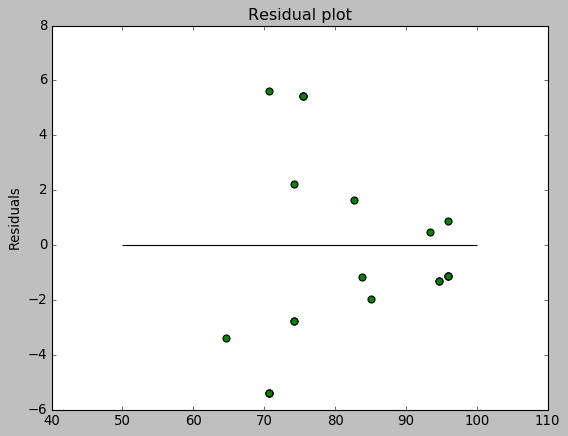

In [223]:
plt.scatter(y_pred_lm3, y_pred_lm3 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')